In [2]:
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

CHUẨN HÓA

In [3]:
data= pd.read_csv("data_clean.csv")

In [4]:
y = data.diagnosis.values
x_data = data.drop(['diagnosis'], axis = 1)

# Chuẩn hóa 
x = (x_data - np.min(x_data))/(np.max(x_data) - np.min(x_data))



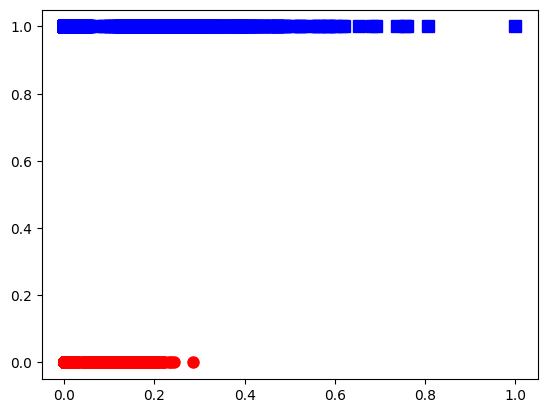

In [5]:
array = x.values[:, 1:]  # Loại bỏ cột chỉ mục
y0 = [i for i in range(y.shape[0]) if y[i]==0]
y1 = [i for i in range(y.shape[0]) if y[i]==1]
X0 = np.array([array[i] for i in y0])
X1 = np.array([array[i] for i in y1])
y_0=np.zeros(len(y0))
y_1=np.ones(len(y1))

plt.plot(X0, y_0, 'ro', markersize = 8)
plt.plot(X1, y_1, 'bs', markersize = 8)
plt.show()

DỮ LIỆU HUẤN LUYỆN VÀ KIỂM TRA

In [6]:

x_train, x_test, y_train, y_test = train_test_split(
	x, y, test_size = 0.15, random_state = 42)

x_train = x_train.T
x_test = x_test.T
y_train = y_train.T
y_test = y_test.T

print("x train: ", x_train.shape)
print("x test: ", x_test.shape)
print("y train: ", y_train.shape)
print("y test: ", y_test.shape)


x train:  (31, 483)
x test:  (31, 86)
y train:  (483,)
y test:  (86,)


ĐỘ LỆCH

In [7]:
def initialize_weights_and_bias(dimension):
	w = np.full((dimension, 1), 0.01)
	b = 0.0
	return w, b


In [8]:
# z = np.dot(w.T, x_train)+b
def sigmoid(z):
	y_head = 1/(1 + np.exp(-z))
	return y_head


In [9]:
def forward_backward_propagation(w, b, x_train, y_train):
	z = np.dot(w.T, x_train) + b
	y_head = sigmoid(z)
	loss = - y_train * np.log(y_head) - (1 - y_train) * np.log(1 - y_head)
	# x_train.shape[1] is for scaling
	cost = (np.sum(loss)) / x_train.shape[1]	 

	# backward propagation
	derivative_weight = (np.dot(x_train, (
		(y_head - y_train).T))) / x_train.shape[1] 
	derivative_bias = np.sum(
		y_head-y_train) / x_train.shape[1]				 
	gradients = {"derivative_weight": derivative_weight,
				"derivative_bias": derivative_bias}
	return cost, gradients


In [10]:
def update(w, b, x_train, y_train, learning_rate, number_of_iterarion):
	cost_list = []
	cost_list2 = []
	index = []

	# tham số cập nhật (học) là number_of_iterarion 
	for i in range(number_of_iterarion):
		# thực hiện lan truyền tiến và lùi và tìm chi phí và độ dốc
		cost, gradients = forward_backward_propagation(w, b, x_train, y_train)
		cost_list.append(cost)

		# cập nhật
		w = w - learning_rate * gradients["derivative_weight"]
		b = b - learning_rate * gradients["derivative_bias"]
		if i % 10 == 0:
			cost_list2.append(cost)
			index.append(i)
			print ("Cost after iteration % i: % f" %(i, cost))

	# trọng số và độ lệch tham số cập nhật 
	parameters = {"weight": w, "bias": b}
	plt.plot(index, cost_list2)
	plt.xticks(index, rotation ='vertical')
	plt.xlabel("Number of Iterarion")
	plt.ylabel("Cost")
	plt.show()
	return parameters, gradients, cost_list


DỰ ĐOÁN

In [11]:
def predict(w, b, x_test):
	z = sigmoid(np.dot(w.T, x_test)+b)
	Y_prediction = np.zeros((1, x_test.shape[1]))

	# if z is bigger than 0.5, our prediction is sign one (y_head = 1),
	# if z is smaller than 0.5, our prediction is sign zero (y_head = 0),
	for i in range(z.shape[1]):
		if z[0, i]<= 0.5:
			Y_prediction[0, i] = 0
		else:
			Y_prediction[0, i] = 1

	return Y_prediction


HUẤN LUYỆN MÔ HÌNH HỒI QUY LOGISTIC

Cost after iteration  0:  0.692995
Cost after iteration  10:  0.638266
Cost after iteration  20:  0.613160
Cost after iteration  30:  0.590799
Cost after iteration  40:  0.570802
Cost after iteration  50:  0.552863
Cost after iteration  60:  0.536710
Cost after iteration  70:  0.522103
Cost after iteration  80:  0.508838
Cost after iteration  90:  0.496739


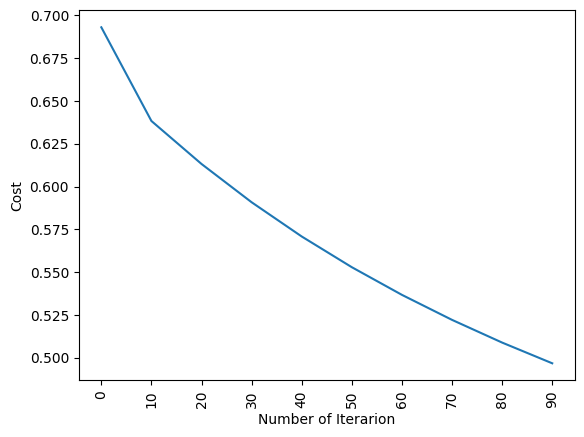

train accuracy: 80.95238095238095 %
test accuracy: 81.3953488372093 %


In [12]:
def logistic_regression(x_train, y_train, x_test, y_test, 
						learning_rate, num_iterations):

	dimension = x_train.shape[0]
	w, b = initialize_weights_and_bias(dimension)
	
	parameters, gradients, cost_list = update(
		w, b, x_train, y_train, learning_rate, num_iterations)
	
	y_prediction_test = predict(
		parameters["weight"], parameters["bias"], x_test)
	y_prediction_train = predict(
		parameters["weight"], parameters["bias"], x_train)

	# train / test Errors
	print("train accuracy: {} %".format(
		100 - np.mean(np.abs(y_prediction_train - y_train)) * 100))
	print("test accuracy: {} %".format(
		100 - np.mean(np.abs(y_prediction_test - y_test)) * 100))
	
logistic_regression(x_train, y_train, x_test, 
					y_test, learning_rate = 1, num_iterations = 100) 


In [13]:
from sklearn import linear_model
logreg = linear_model.LogisticRegression(random_state = 42, max_iter = 150)
print("test accuracy: {} ".format(
	logreg.fit(x_train.T, y_train.T).score(x_test.T, y_test.T)))
print("train accuracy: {} ".format(
	logreg.fit(x_train.T, y_train.T).score(x_train.T, y_train.T)))


test accuracy: 0.8953488372093024 
train accuracy: 0.8592132505175983 


LƯU MÔ HÌNH

In [14]:
import joblib
joblib.dump(logreg, 'logistic_regression_model.pkl')

['logistic_regression_model.pkl']